# Stage 1. Simulation based on the Statistical Mechanics of Money

In [ ]:
%cd
! pip install plotly==5.3.1

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
import seaborn as sns
import random
import math

### Functions: Entropy and Objective Function

In [2]:
def calcEntropy(df):
    n = df['Money'].tolist()
    c = df['Class'].count()
    s1 = c*np.log(c)
    s2 = 0
    eClas = list(set(df['Class'].tolist())) #Unique values
    for e in eClas:
        aux = df.loc[df['Class'] == e]
        nk = aux['Class'].count()
        lnk = np.log(nk)
        s2 += nk*lnk
    
    S = s1 - s2
    return S

def Ouno(df,a):
    # a should be greater than 0 (a > 0)
    # C = df['Class'].count() # Number of classes.
    O = 0 # Performance of the system.
    eClas = list(set(df['Class'].tolist())) #Unique values.
    for e in eClas:
        aux = df.loc[df['Class'] == e] # Get the all the class.
        Mk = aux['Money'].mean()# Average money of each agent of the given class.
        O += a*Mk # Function O1(M)
    
    return O
        
def Odos(df,a):
    # a should be greater than 0 (a > 0)
    # C = df['Class'].count() # Number of classes.
    O = 0 # Performance of the system.
    eClas = list(set(df['Class'].tolist())) #Unique values.
    for e in eClas:
        aux = df.loc[df['Class'] == e] # Get the all the class.
        Mk = aux['Money'].mean()# Average money of each agent of the given class.
        O += 1-(math.exp(-a*Mk)) # Function O1(M)
    
    return O

### General Parameters

In [26]:
C = 1000 # Money classes.
M = 50000 # Total amount of money given by sum(m_{i}).
N = 500; # Agents.
a = 1 # Parameter for Objective Function. Should be greater than 0 (a > 0)

dfFinal = pd.DataFrame(columns=['Money','Class','Case']) # Empty df for animation.

entropy = [] # Entropy.
money = [] # Money.
reservoir = [0] # Money to redistribute.
moneyPartial = [] # Money partial.
wellness = [] # Performance of the system

In [27]:
dfFinal

,Money,Class,Case


### Initial distributions
First, we started with the **Delta distribution** given by $\delta(m_{l}-\frac{M}{N})$

In [28]:
Mi = M/N # Delta distribution - All agents have the same amount of money.
Ma = np.ones(N) * Mi # Initial values of agents money.
print(f'Cada uno esta comenzando con {Mi} pesos')

Cada uno esta comenzando con 100.0 pesos


Also, we have the uniform distribution given by $f(m_{l}) = cte$

In [29]:
# code

In [30]:
d = {"Money": Ma} # {"Money": Ma, "Class": Ci, "variable": data}.
df = pd.DataFrame(d) # Create a dataframe to store each iteration.

In [31]:
# Create the classes based on M and C.
scale = [M/(4*C)]*(int(C/2))
for i in range(int(C/2)):
    scale[i] = scale[i]*i
#lab = [str(i) for i in scale]
labe = list(np.linspace(scale[0],scale[-1],len(scale)))
labe.pop()
#print(labe)

6237.5

In [32]:
df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
df['Case'] = 0;
dfFinal = pd.concat([dfFinal,df])

In [33]:
money.append(df['Money'].sum()) # Initial money
entropy.append(calcEntropy(df)) # Initial entropy

In [34]:
#df.head(10)

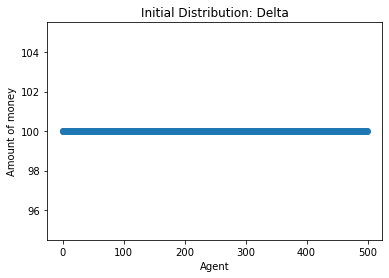

In [35]:
plt.scatter(df.index,df.Money)
plt.title('Initial Distribution: Delta')
plt.xlabel('Agent')
plt.ylabel('Amount of money')
plt.show()

<AxesSubplot:xlabel='Money', ylabel='Count'>

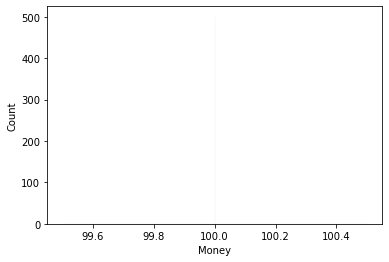

In [36]:
sns.histplot(data=df,x='Money',bins=C)

In [37]:
# S = N ln(N) - sum(n_{i}ln(n_{i}))
# S = N ln(C)
# M = (N*dm/2)(k+2)

## System Evolution

### Using a fixed dM

In [15]:
#dM = 3 # Parameter provided by Yakobenko. Should be always positive.
       # Further considerations will be more complex

t = 10000 # Given time to the system evolution

In [16]:
for i in range(t):  
    v = np.random.uniform(0, 1) # Random fraction 0 < v < 1
    s = np.random.choice([-1,1]) # Random variable either -1 or 1.
    
    p = random.sample(range(N),2) 
    
    #mk = df.iat[p[i,0],0]
    #ml = df.iat[p[i,1],0]
    mk = df.iat[p[0],0]
    ml = df.iat[p[1],0]
    
    
    # Possible dM's
    dM = v *(mk + ml)/2 # Exchange of random fraction v 
                       # of the average money of the pair.
    # dM = v * M/N # Exchange of random fraction v of the average
                   # of the system
    if (ml - dM) > 0:
        df.at[p[0],'Money'] = mk + dM
        df.at[p[1],'Money'] = ml - dM
    
    df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
    df['Case'] = i+1
    # dfFinal = pd.concat([dfFinal,df])
    # wellness.append(Ouno(df,a)) # Wellnes with O1
    wellness.append(Odos(df,a)) # wellnes with O2
    money.append(df['Money'].sum())
    entropy.append(calcEntropy(df))


In [17]:
#scale

In [18]:
#px.scatter(dfFinal,x=dfFinal.index,y='Money',animation_frame='Case'
           #,color='Case')

### Final distribution

In [19]:
df.sample(n=15) # Last iteration

,Money,Class,Case
110,185.872313,175.0,10000
241,140.419158,137.5,10000
427,185.149486,175.0,10000
60,100.570892,100.0,10000
324,150.242113,150.0,10000
17,147.330229,137.5,10000
90,123.175214,112.5,10000
265,10.074124,0.0,10000
156,117.082853,112.5,10000
338,60.141897,50.0,10000


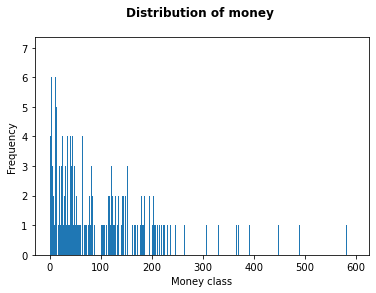

In [20]:
plt.hist(df['Money'],C)
plt.title('Distribution of money \n',fontweight ='bold')
plt.xlabel('Money class')
plt.ylabel('Frequency')
plt.show()

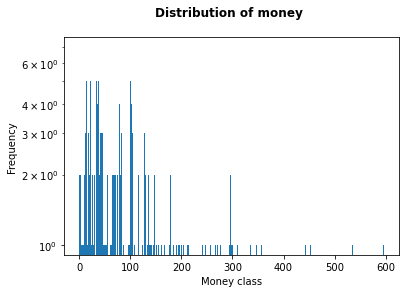

In [21]:
plt.hist(df['Money'],C,log=True)
plt.title('Distribution of money \n',fontweight = 'bold')
plt.xlabel('Money class')
plt.ylabel('Frequency')
plt.show()

### Entropy through time

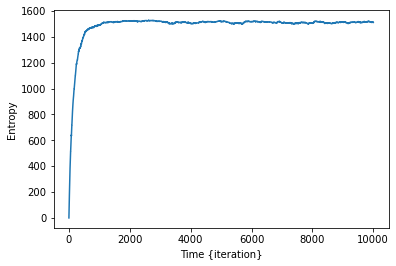

In [22]:
plt.plot(entropy)
plt.ylabel('Entropy')
plt.xlabel('Time {iteration}')
plt.show()

In [23]:
print(f'The final value of the entropy is: {entropy[-1]}')

The final value of the entropy is: 1510.6676250427174


### Conservation of Money ***(M)***

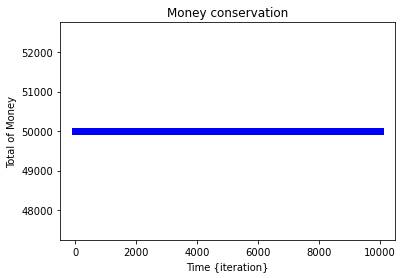

In [24]:
plt.plot(money,'bs')
plt.title('Money conservation')
plt.xlabel('Time {iteration}')
plt.ylabel('Total of Money')
plt.show()

### Evolution of collective profit

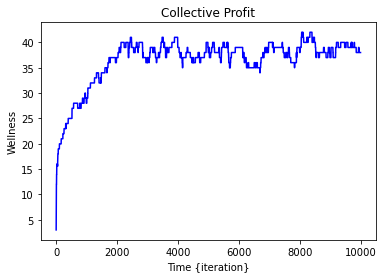

In [25]:
plt.plot(wellness,'b')
plt.title('Collective Profit')
plt.xlabel('Time {iteration}')
plt.ylabel('Wellness')
plt.show()

## Case : Special Agent
Simulating a government effect which takes a fraction $\lambda_{t}$ of each transaction and redistributes every certain time $\tau_{s}$

We have to run again the first section ***General Parameters*** and ***Initial Distribution***

In [38]:
#dM = 3 # Parameter provided by Yakobenko. Should be always positive.
       # Further considerations will be more complex

t = 10000 # Given time to the system evolution

tax = 0.84 # According to Mexican's Laws the IVA is around 16% of each transaction

timer = 0 # Trigger to the redistribution
token = t/100 # Parameter for the redistribution

In [40]:
for i in range(t):
    
    if (timer == token):
        r = sum(reservoir)/N # Constant r is the average of the total taxes collected.
        df['Money'] = df['Money'] + r # Add r to the current money of each agent
        reservoir = [0] # Restart the money in the bank
        timer = 0
    
    v = np.random.uniform(0, 1) # Random fraction 0 < v < 1
    s = np.random.choice([-1,1]) # Random variable either -1 or 1.
    
    p = random.sample(range(N),2) 
    
    #mk = df.iat[p[i,0],0]
    #ml = df.iat[p[i,1],0]
    mk = df.iat[p[0],0]
    ml = df.iat[p[1],0]
    
    
    # Possible dM's
    dM = v *(mk + ml)/2 # Exchange of random fraction v 
                       # of the average money of the pair.
    # dM = v * M/N # Exchange of random fraction v of the average
                   # of the system
    if (ml - dM) > 0:
        reservoir.append(dM*0.16)
        df.at[p[0],'Money'] = mk + dM*tax # TAX
        df.at[p[1],'Money'] = ml - dM
    
    df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
    df['Case'] = i+1
    
    #dfFinal = pd.concat([dfFinal,df])
    
    # wellness.append(Ouno(df,a)) # Wellnes with O1
    wellness.append(Odos(df,a)) # wellnes with O2
    money.append(df['Money'].sum()+sum(reservoir))
    moneyPartial.append(df['Money'].sum())
    entropy.append(calcEntropy(df))
    
    timer += 1 # Update the value of the iteration

###  Distribution with redistribution

<AxesSubplot:xlabel='Money', ylabel='Count'>

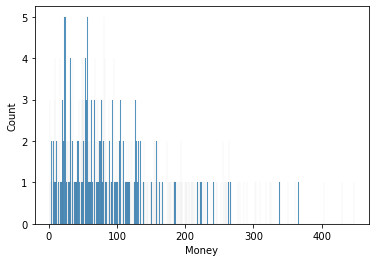

In [41]:
sns.histplot(data=df,x='Money',bins=C)

In [42]:
df.sample(n=15) # Last iteration

,Money,Class,Case
226,95.633607,87.5,10000
494,55.197444,50.0,10000
95,265.620176,262.5,10000
422,141.487667,137.5,10000
115,60.325082,50.0,10000
398,32.848647,25.0,10000
174,127.313300,125.0,10000
342,41.264486,37.5,10000
315,32.053660,25.0,10000
77,32.242718,25.0,10000


In [43]:
#px.scatter(dfFinal,x=dfFinal.index,y='Money',animation_frame='Case'
           #,color='Case')

### Entropy through time

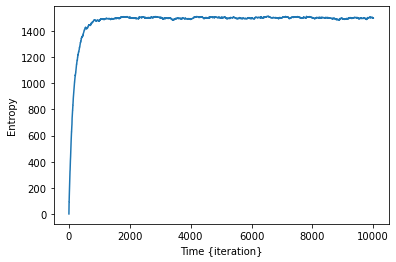

In [44]:
plt.plot(entropy)
plt.ylabel('Entropy')
plt.xlabel('Time {iteration}')
plt.show()

### Final value of entropy

In [45]:
print(f'The final value of the entropy is: {entropy[-1]}')

The final value of the entropy is: 1501.1040446334719


### Conservation of Money ***(M)***

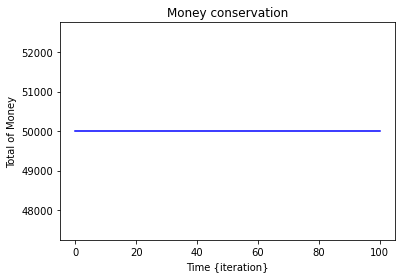

In [46]:
plt.plot(money[::100],'b')
plt.title('Money conservation')
plt.xlabel('Time {iteration}')
plt.ylabel('Total of Money')
plt.show()

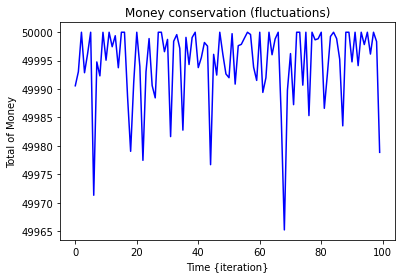

In [47]:
plt.plot(moneyPartial[::100],'b')
plt.title('Money conservation (fluctuations)')
plt.xlabel('Time {iteration}')
plt.ylabel('Total of Money')
plt.show()

### Evolution of collective profit

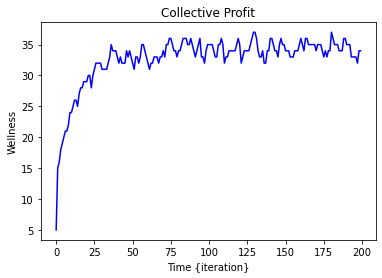

In [48]:
plt.plot(wellness[::50],'b')
plt.title('Collective Profit')
plt.xlabel('Time {iteration}')
plt.ylabel('Wellness')
plt.show()

# Stage 2. Simulating the evolution of collective profit

Be $O$ the **objective function of the system**, which meaures the global performance of the system, it's given by $O(n_{1},n_{2},...,n_{c})=\sum_{k=1}^{C}n_{k}o_{1}(M_{k})$ where $M_{k}$ is the amount of money of each member of the class $k$ and $n_{k}$ is the number of agents in the same class; $C$ is the number of classes.

The place of this part is only for the purpose of relating to the given planning, the ***WELLNESS*** is being calculated within the main for loops. 

def Ouno(df,a):
    # a should be greater than 0 (a > 0)
    # C = df['Class'].count() # Number of classes.
    O = 0 # Performance of the system.
    eClas = list(set(df['Class'].tolist())) #Unique values.
    for e in eClas:
        aux = df.loc[df['Class'] == e] # Get the all the class.
        Mk = aux['Money'].mean()# Average money of each agent of the given class.
        O += a*Mk # Function O1(M)
        
def Odos(df,a):
    # a should be greater than 0 (a > 0)
    # C = df['Class'].count() # Number of classes.
    O = 0 # Performance of the system.
    eClas = list(set(df['Class'].tolist())) #Unique values.
    for e in eClas:
        aux = df.loc[df['Class'] == e] # Get the all the class.
        Mk = aux['Money'].mean()# Average money of each agent of the given class.
        O += 1-(exp(-a*Mk)) # Function O1(M) 